# StarryNight

## Team Members
- 902011, Moleri Andrea, a.moleri@campus.unimib.it
- 856114, Costantini Davide, d.costantini6@campus.unimib.it
- 865939, Armani Filippo, f.armani1@campus.unimib.it

## Description of the Reference Domain and Objectives

The StarryNight project aims to construct a star classification system utilizing machine learning techniques acquired during the course of the Machine Learning curriculum. The primary objective is to demonstrate that stars adhere to a discernible pattern, specifically referred to as the Hertzsprung-Russell Diagram or HR-Diagram. This diagram serves as the basis for classifying stars by plotting their features, providing valuable insights into their characteristics.

## Design Choices for Dataset Creation, Hypotheses, and Assumptions

![](../Images/Spectral%20Class%20Diagram.png)

In crafting the dataset, we assume that stars exhibit identifiable patterns in their features, allowing for meaningful classification. The HR-Diagram will be employed as the guiding framework for the classification system. The dataset will encompass a range of features crucial for classification:

- **Absolute Temperature**: the absolute temperature of a celestial body, denoted by the symbol $T$, is measured in Kelvin $(K)$. It represents the temperature of the body on the Kelvin scale, an absolute temperature scale where $0K$ corresponds to absolute zero, the theoretical lowest temperature possible. Absolute temperature is a fundamental parameter in astrophysics and is crucial for understanding the thermodynamic characteristics of celestial objects.

- **Relative Luminosity**: relative luminosity, expressed as $L/L_o$, denotes the ratio of a celestial body's luminosity $(L)$ to the solar luminosity $(L_o)$. Luminosity is the total amount of energy radiated by the object per unit time. This dimensionless quantity provides insights into the intrinsic brightness of a celestial body relative to the Sun, serving as a key metric for comparative stellar analyses.

- **Relative Radius**: the relative radius, denoted by $R/R_o$, represents the ratio of a celestial body's radius $(R)$ to the solar radius $(R_o)$. This dimensionless parameter is essential in characterizing the size of celestial bodies, facilitating the comparison of their physical dimensions relative to the Sun, which serves as a standard reference.

- **Absolute Magnitude**: absolute magnitude $(M_v)$ is a measure of the intrinsic brightness of a celestial object as it would appear if placed at a standard distance of 10 parsecs from an observer. This parameter is defined on the logarithmic scale, and its determination involves corrections for both distance and interstellar extinction. Absolute magnitude enables astronomers to assess the true luminosity of celestial bodies independent of their varying distances from Earth.

- **Star Color**: the term "Star Color" refers to the visual perception of a celestial object's hue as observed from Earth. This qualitative characteristic is attributed to the dominant wavelengths emitted by the star's surface. Common colors include white, red, blue, yellow, and yellow-orange. The analysis of star color provides valuable information about the temperature and composition of a star's outer layers.

- **Spectral Class**: spectral class categorizes stars based on their spectral characteristics, primarily determined by the temperature of their surfaces. The spectral sequence, from hottest to coolest, is denoted by the letters $O, B, A, F, G, K$, and $M$. This classification system aids astronomers in classifying stars and understanding their fundamental properties, such as temperature, luminosity, and chemical composition.

- **Star Type**: star type refers to the broader categorization of celestial objects based on their evolutionary stage and physical characteristics. This classification includes Red Dwarfs, which are low-mass and long-lived stars; Brown Dwarfs, sub-stellar objects not massive enough to sustain nuclear fusion; White Dwarfs, remnants of low to medium-mass stars; Main Sequence stars, like our Sun, undergoing hydrogen fusion; SuperGiants, massive and luminous stars; and HyperGiants, the most massive and intrinsically bright stars in the stellar hierarchy. Understanding star types is crucial for comprehending the diverse life cycles of stars in the cosmos.


The designated target for our classification endeavors will be the **Star Type**. The following definitions apply:

- $Lo = 3.828 * 10^{26}~Watts$ _(Average Luminosity of the Sun)_
- $Ro = 6.9551 * 10^{8}~m$ _(Average Radius of the Sun)_

## Data Formatting and Analysis

Let's star by running the code snippet below, that is needed in order to import all the necessary dependencies for the project.

In [40]:
# Importing the necessary dependencies
import keras
import tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Dense
from keras.models import Sequential
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

What follows is the preliminary formatting of the dataset, that ensures that all the considered instances have correct and well-formatted values. It is also important to make sure that the target column is a categorical data type, which will lead to better performances, not only in operations, but also in training our model.

In [41]:
# Reading the dataset from a CSV file
df = pd.read_csv("StarsDataset.csv")

# Converting each color to uppercase for consistency, removing leading and 
# trailing whitespaces, and replacing spaces with hyphens to ensure uniformity
df["Star Color"] = [color.upper().strip().replace(" ", "-") for color in df["Star Color"]]

# Converting the "Star Color" column to a categorical data type
df["Star Color"] = df["Star Color"].astype("category")

# Printing the results of our formatting
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv),Star Type,Star Color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,RED,M
1,3042,0.000500,0.1542,16.60,0,RED,M
2,2600,0.000300,0.1020,18.70,0,RED,M
3,2800,0.000200,0.1600,16.65,0,RED,M
4,1939,0.000138,0.1030,20.06,0,RED,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,BLUE,O
236,30839,834042.000000,1194.0000,-10.63,5,BLUE,O
237,8829,537493.000000,1423.0000,-10.73,5,WHITE,A
238,9235,404940.000000,1112.0000,-11.23,5,WHITE,A


Having confirmed the dimensions and main features of the dataframe, our attention is now directed towards understanding the distribution of values within each target class. The upcoming code snippet aims to underline the distribution of the number of instances associated with each target classes. The values within the target classes appear to be evenly distributed, presenting a balanced sampling across the dataset. After this consideration, we will also describe the dataframe for easier reference, including relevant statistical values such as means and percentiles.

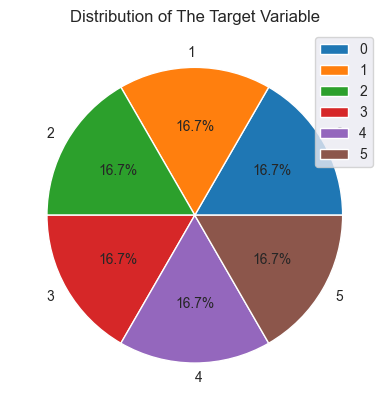

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv),Star Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [42]:
# Visualizing the distribution of the target variable using a pie chart
plt.pie(df["Star Type"].value_counts(), labels=["0", "1", "2", "3", "4", "5"], autopct="%1.1f%%")

# Adding a legend for clarity
plt.legend()

# Setting a title for the plot
plt.title("Distribution of The Target Variable")

# Displaying the pie chart
plt.show()

# Generating relevant statistics for the dataset
df.describe()

Let's begin by visually exploring the dataset through a normalized bar plot, with a focus on the star type as our target variable. Consequently, we will depict all numerical attributes in relation to the star type itself, providing insight into their distribution. It is essential to acknowledge that the numeric values are normalized on a scale between 0 and 1. This normalization ensures visibility, considering the substantial differences in orders of magnitude among the represented values.

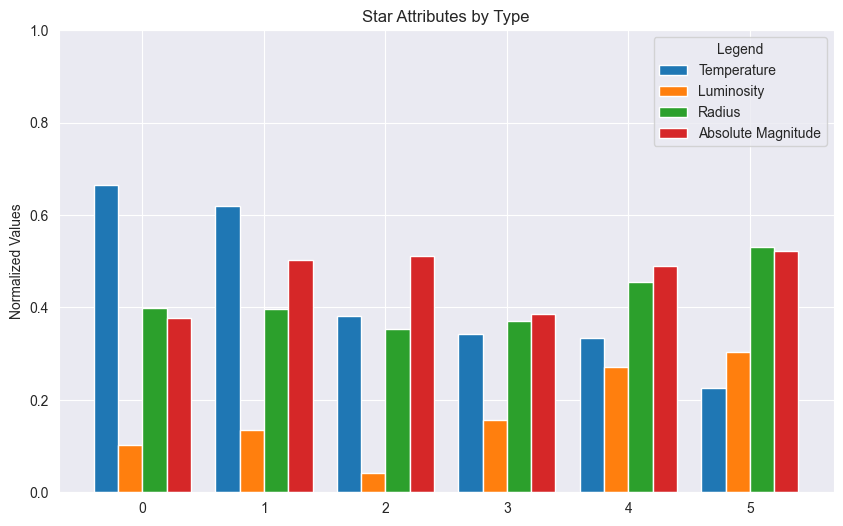

In [43]:
# Define a normalization function to scale a series between 0 and 1
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Extract unique star types from the "Star Type" column
starTypes = df["Star Type"].unique()

# Create a temporary DataFrame for normalization
temp_df = df.copy()

# Normalize selected attributes based on star type
temp_df["Temperature (K)"] = temp_df.groupby("Star Type")["Temperature (K)"].transform(normalize)
temp_df["Luminosity(L/Lo)"] = temp_df.groupby("Star Type")["Luminosity(L/Lo)"].transform(normalize)
temp_df["Radius(R/Ro)"] = temp_df.groupby("Star Type")["Radius(R/Ro)"].transform(normalize)
temp_df["Absolute Magnitude(Mv)"] = temp_df.groupby("Star Type")["Absolute Magnitude(Mv)"].transform(normalize)

# Calculate mean values for each normalized attribute grouped by star type
value_means = {
    "Temperature": temp_df.groupby("Star Type")["Temperature (K)"].mean(),
    "Luminosity": temp_df.groupby("Star Type")["Luminosity(L/Lo)"].mean(),
    "Radius": temp_df.groupby("Star Type")["Radius(R/Ro)"].mean(),
    "Absolute Magnitude": temp_df.groupby("Star Type")["Absolute Magnitude(Mv)"].mean()
}

# Plotting the normalized attributes by star type
x = np.arange(len(starTypes))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6))  

# Iterating through attribute means and plotting bar charts
for attribute, measurement in value_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Setting plot labels and formatting
ax.set_ylabel('Normalized Values')
ax.set_title('Star Attributes by Type')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(starTypes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

# Displaying the legend inside the plot for better aesthetics
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0), title='Legend')  

# Display the plot
plt.show()

Following some iterative experimentation, a scatter plot is employed to visually represent a pair of attributes exhibiting linear separability. Specifically, our investigation identifies "Temperature (K)" and "Absolute Magnitude (Mv)" as the optimal attributes for this purpose within the dataframe. The resultant plot  affirms that there is no necessity for remapping the existing attribute space to a new one, as the selected attributes already effectively capture the desired linear separation.

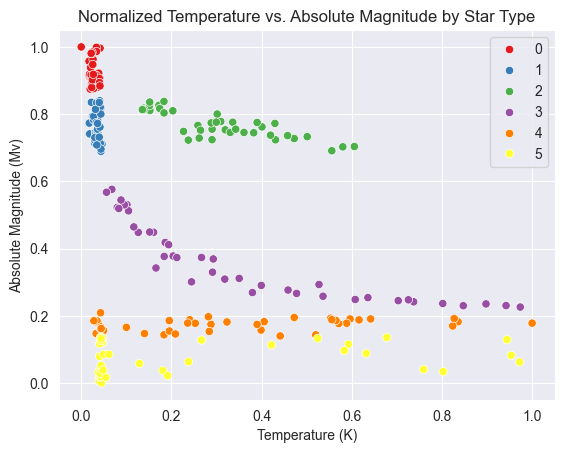

In [44]:
# Creating a scatter plot using Seaborn
ax = sns.scatterplot(
    x=df["Temperature (K)"].transform(normalize),
    y=df["Absolute Magnitude(Mv)"].transform(normalize),
    hue=df["Star Type"],
    palette="Set1"
)

# Setting labels for the x and y axes
ax.set(xlabel='Temperature (K)', ylabel='Absolute Magnitude (Mv)')

# Adding a title to the plot
plt.title('Normalized Temperature vs. Absolute Magnitude by Star Type')

# Adding a legend for better interpretation
ax.legend(loc='best')

# Displaying a grid on the plot for improved readability
ax.grid(True)

# Displaying the scatter plot
plt.show()

We then move on to Principal Component Analysis, starting with Variance Analysis

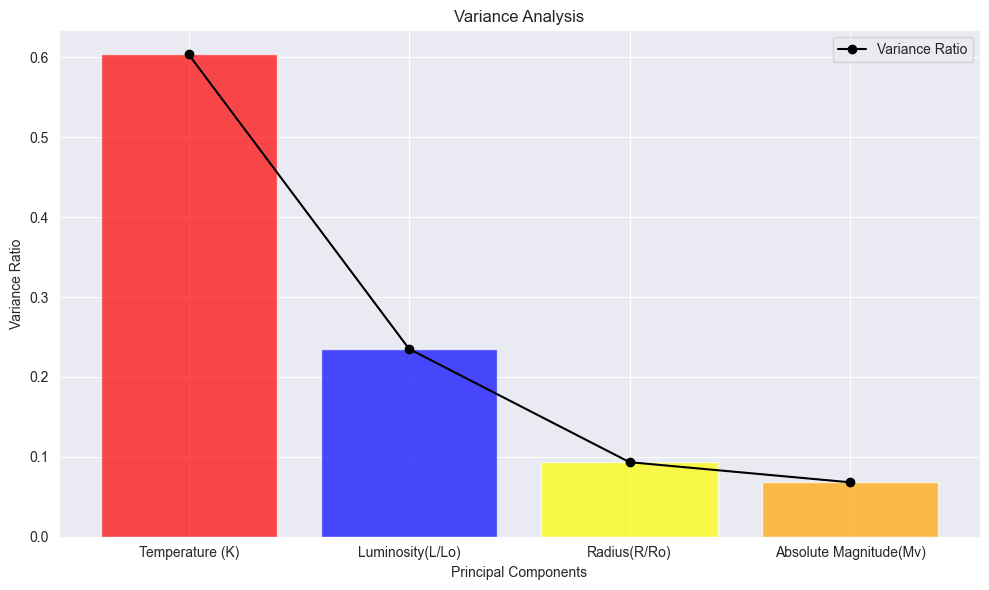

In [45]:
# Selecting attributes for analysis, assuming the first four columns of the DataFrame
attributes = list(df.columns[:4])

# Standardizing the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[attributes])

# Applying Principal Component Analysis (PCA) on the scaled data
pca = PCA().fit(scaled_data)

# Define a list of colors for the bars
colors = ['red', 'blue', 'yellow', 'orange']

# Plotting the explained variance ratios for each principal component as bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(attributes, pca.explained_variance_ratio_, color=colors, alpha=0.7)

# Plotting a line connecting the peaks
ax.plot(attributes, pca.explained_variance_ratio_, marker='o', color='black', label='Variance Ratio')

# Adding labels and title to the plot
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Variance Analysis")

# Adding legend
plt.legend()

# Adjusting layout to avoid label overlapping
plt.tight_layout()

# Displaying the plot
plt.show()

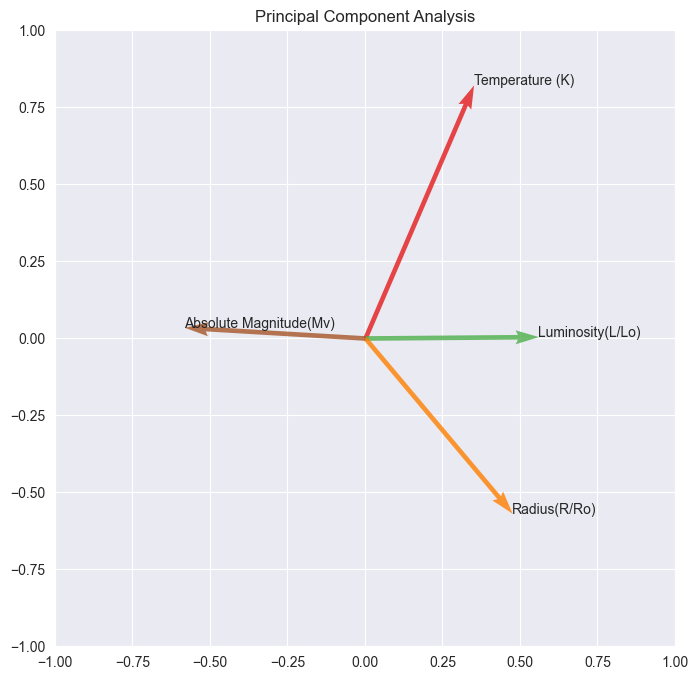

In [46]:
pcs = pca.components_

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot arrows from origin to (x, y)
    ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color=plt.cm.Set1(i/len(pcs[0])), alpha=0.8)

    # display the label of the point
    ax.text(x, y, df.columns[i], fontsize='10')

# Add labels and title
ax.set_title("Principal Component Analysis")

# Add grid
ax.grid(True)

# Displaying the plot
plt.show()

### Variance Analysis Considerations 
- **Temperature $(K)$:** a Variance Ratio of approximately $0.6$ indicates a moderate variance compared to the reference population. This may suggest that stellar temperatures in the dataset are relatively homogeneous, but there are still significant differences.
- **Luminosity $(L/Lo)$:** a Variance Ratio of approximately $0.2$ indicates lower variance compared to temperatures, but it is still present. The luminosities of stars in the dataset appear to be more homogeneous compared to temperatures.
- **Radius $(R/Ro)$:** a Variance Ratio of about $0.1$ suggests low variance compared to the reference population for stellar radius. This may indicate that the radius of stars in the dataset are relatively similar to each other.
- **Absolute Magnitude $(Mv)$:** a Variance Ratio of approximately $0.05$ indicates very low variance compared to the reference population for absolute magnitude. This suggests that absolute magnitudes of stars in the dataset are very similar to each other.

In light of these considerations, it is our judgment that a reduction in the dataset's dimensionality is unwarranted. The numeric attributes currently at our disposal demonstrate adequate descriptiveness and non-redundancy in portraying the characteristics of the target class. Consequently, a decision has been reached to avoid the implementation of principal component analysis in this instance.

## Creation of train and test sets
Let's begin by dividing the Dataset into two categories: train and test

In [120]:
file_path = "./StarsDataset.csv"
stars_data = pd.read_csv(file_path)
stars_data['target'] = stars_data['Star Type']  
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv),target,Star Color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,RED,M
1,3042,0.000500,0.1542,16.60,0,RED,M
2,2600,0.000300,0.1020,18.70,0,RED,M
3,2800,0.000200,0.1600,16.65,0,RED,M
4,1939,0.000138,0.1030,20.06,0,RED,M


In [121]:
from sklearn.model_selection import train_test_split

feature_columns = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute Magnitude(Mv)"]

X_train, X_test, y_train, y_test = train_test_split(stars_data[feature_columns], stars_data["target"], test_size=0.3, random_state=42)


Let's also standardize the features in the dataframe

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[feature_columns] = scaler.fit_transform(X_train[feature_columns])
X_test[feature_columns] = scaler.transform(X_test[feature_columns])

# Visualizza le statistiche descrittive delle features nel training set
X_train.describe()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv)
count,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02
mean,5.815454e-17,5.286776e-17,-4.229421e-17,2.114711e-17
std,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00
min,-9.071270e-01,-6.054953e-01,-4.326185e-01,-1.592638e+00
25%,-7.453898e-01,-6.054953e-01,-4.324299e-01,-1.030413e+00
50%,-4.101059e-01,-6.054949e-01,-4.310897e-01,3.635968e-01
75%,4.271109e-01,5.800324e-01,-3.581328e-01,8.970099e-01
max,2.989489e+00,4.372002e+00,3.517527e+00,1.499360e+00


## First Approach: Decision Trees
#### *TODO: Add Decision Tree Process*

## Second Approach: Neural Networks
Our decision to employ a Neural Network Model for stellar classification is motivated by several factors. First of all, the capability of neural networks allows them to autonomously recognize patterns in data, a crucial aspect when dealing with the structures present in stellar datasets. Furthermore, the adaptability of neural networks to diverse data types proves advantageous in handling the variability of attributes present in the dataset. We believe the model can recognize patterns more accurately compared to simpler models.

One of the most relevant features is the generalization capability of a well-trained neural network, that will enable accurate predictions for stars not present in the training set, provided they share similarities with the training dataset. This may prove its usefulness, as astronomical data constantly expands over time. Moreover, the scalability of neural models with increased data volume further enhances their performance, making them particularly advantageous when access to larger datasets becomes available. In other words, if more data becomes available in the future, given a similar formatting, the model will still be able to both improve and maintain a good level of precision.

### Implementation of One-Hot Encoded Format for Standardized Categorical Representation in Neural Network Training
The code block below serves the purpose of converting class labels into categorical format. In this particular context, the Keras library is employed for its ease in implementing neural networks, while the Scikit-learn library is reserved for basic machine learning models. The Keras utility function `to_categorical` is utilized for transforming class labels into a one-hot encoded representation. This encoding ensures a standardized format for categorical data, especially beneficial for neural network training. Each class label is mapped to a one-hot vector. This transformation is essential in the context of machine learning, specifically for tasks involving classification, as it facilitates effective model interpretation and learning.

In [123]:
import keras
from keras.models import Sequential
from keras.layers import Dense

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

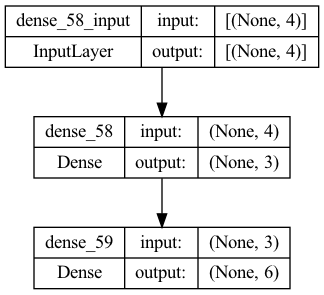

In [124]:
from keras.models import Sequential
from keras.layers import Dense

# Definiamo l'archietettura della rete neurale:
# un primo layer di input con 4 neuroni (perchè ci sono 4 features in input)
# un scondo layer con 3 neuroni
# un ultimo layer con 3 neuroni, poiché la label è un vettore di 3 componenti (es [0, 1, 0])
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

In [125]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
34/34 [==============================] - 1s 8ms/step - loss: 1.8208 - accuracy: 0.1667 - val_loss: 1.7701 - val_accuracy: 0.2222
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 1.7755 - accuracy: 0.1607 - val_loss: 1.7304 - val_accuracy: 0.2222
Epoch 3/10
34/34 [==============================] - 0s 3ms/step - loss: 1.7373 - accuracy: 0.1667 - val_loss: 1.6948 - val_accuracy: 0.2222
Epoch 4/10
34/34 [==============================] - 0s 3ms/step - loss: 1.7034 - accuracy: 0.1845 - val_loss: 1.6608 - val_accuracy: 0.2500
Epoch 5/10
34/34 [==============================] - 0s 3ms/step - loss: 1.6696 - accuracy: 0.1964 - val_loss: 1.6278 - val_accuracy: 0.2500
Epoch 6/10
34/34 [==============================] - 0s 3ms/step - loss: 1.6359 - accuracy: 0.2262 - val_loss: 1.5954 - val_accuracy: 0.2639
Epoch 7/10
34/34 [==============================] - 0s 3ms/step - loss: 1.6011 - accuracy: 0.2321 - val_loss: 1.5589 - val_accuracy: 0.2778
Epoch 8/10
34/34 [==

In [126]:
# Serialize the model weights to HDF5 format
save_location = "./Weights/model.h5"
model.save_weights(save_location)

# Print a confirmation message
print(f"The model was successfully saved to disk. You can find it in the {save_location} folder.")

# Convert the model architecture to JSON format and save it to a separate file
model_json = model.to_json()
with open(save_location, "w") as json_file:
    json_file.write(model_json)

The model was successfully saved to disk. You can find it in the ./Weights/model.h5 folder.
